<a href="https://colab.research.google.com/github/danielfrgs/LCD-PCCD-2021-1/blob/main/Tarea5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Primer Ejercicio

La implementación del Algoritmo se realizará para la medida Euclidiana, y considerando el 'single linkage', recordando que:

Single linkage: utiliza la distancia más corta entre dos vectores de cada grupo $$L(A, B)=\min \left\{d_{v}\left(\mathbf{x}_{k}, \mathbf{x}_{l}\right) \mid \mathbf{x}_{k} \in A, \mathbf{x}_{l} \in B\right\}$$

In [12]:
# Bibliotecas necesarias
import numpy as np
import pandas as pd
import sys
from sklearn.metrics.pairwise import euclidean_distances

In [13]:
# Vamos a crear una función que reciba los datos X y n_clusters; el resto de los 
# parámetros como affinity, la vamos a determinar por la distancia 'euclidean', y
# linkage = 'sigle'.

def HierarchicalClustering(X, n_clusters):
    '''
    HierarchicalClustering:
      Función que permite obtener obener las clasificaciones en un conjunto de datos
      a partir del número de clusters requerido, mediante la distancia euclideana
      y el single linkage

    Parámetros
    ----------
    X : Array, DataFrame
        Array o DataFrame que contenga el conjunto de datos que deseamos clasificar
    n_clusters : integer
        Número entero que indica el número de clusters que deseamos, debe ser menor o 
        igual a la dimención de los datos

    Retorna
    ----------
    clousters[distancias.shape[0] - n_clusters] : List
        Lista donde se establecen la clasificación de cada dato de nuesro conjunto inicial
  '''
    # Vamos a obtener la matriz de distancias
    distancias = euclidean_distances(X, X)
    # Para poder determinar las distancias minimas vamos a sustituir los valores de la 
    # diagonal, dado que al ser una matriz simetrica estos so pequeños y pueden causar conflictos
    np.fill_diagonal(distancias,sys.maxsize)

    # Vamos a empezar la clasificación, a partir del 'simple linkage'
    # Vamos a crear un diccionarioo para establecer las clasificaciones.
    clousters = {}
    # Vamos a establecer las llaves del diccionario por medio de las cantidad de puntos 
    # a clasificar

    # Inicializamos el contador sobre los datos
    datos = []
    # Generamos la primera iteración con todos los puntos
    for i in range(distancias.shape[0]):
      datos.append(i)
    # Anexamos dicha iteración al diccionario en la llave 0
    clousters[0] = datos.copy()


    # Iniciamos el ciclo for iniciado desde 1 porque ya hicimos el caso 0.
    for l in range(1, distancias.shape[0]):
          min_val = sys.maxsize
          # Vamos a encontrar el valor mínimo de la matriz de distancias
          # Vamos a recorrerla con un doble 'for'
          for i in range(distancias.shape[0]):
            for j in range(distancias.shape[1]):
              if distancias[i][j] <= min_val:
                min_val = distancias[i][j]
                row = i
                col = j

          # Ahora vamos a actualizar la matriz de distancias siguiendo el 'simple linkage'
          for k in range(distancias.shape[0]):
            # REcordemos que el 'simple linkage' nos pide el mínimo de las distancias euclidianas, 
            # en dos conjuntos, entonces, si k es diferente la la columna sobre la que estamos iterando:
            if k != col:
              simplemin = min(distancias[col][k], distancias[row][k])
              # Actualización de la matriz de distancias.
              distancias[col][k] = simplemin
              distancias[k][col] = simplemin

          # establecer las filas y columnas para el clúster con un índice más alto 
          for m in range(distancias.shape[0]):
            distancias[row][m] = sys.maxsize
            distancias[m][row] = sys.maxsize
          
          # Determinamos el minimo y maximos para el cambio de clouster
          minimo = min(row,col)
          maximo = max(row,col)
          # Cambiamos la casificación de los datos
          for n in range(len(datos)):
            if datos[n] == maximo:
              datos[n] = minimo
          # Anexamos al directorio ahora con la llave en el valor de la iteración
          clousters[l] = datos.copy()
    
    # Retornamos la proyección sobre la llave el diccionario que queremos

    return clousters[distancias.shape[0] - n_clusters]

Ahora vamos a probar la función definida, con el conjunto de datos visto en clase. En el ejercicio 2, se implementará la misma clasificación pero con la función establecida en Sklearn, lo cual nos ayudará a ver que tan bien funciona nuestro algoritmo.

In [14]:
url = 'https://bit.ly/2COHM14'

data = pd.read_csv(url)

from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
# Clasificación
clas = HierarchicalClustering(data_scaled, 2)

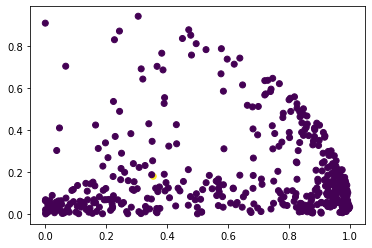

In [15]:
plt.scatter(data_scaled['Fresh'], data_scaled['Frozen'], c = clas)

## Conclusión:

Como se podrá comparar un poco más adelante, la clasificación corresponde con lo que se espera del algoritmo implementado en Sklearn. En ambos casos se muestra como bajo 'single linkage' la capacidad de clasificación es muy baja. Pero se debe al linkage implementado, el cual es el más basico y sencillo, y para una tarea con tantos puntos, puede ser superado.

#Segundo Ejercicio



## Medida Euclidea

En la siguiente celda tomamos el conjunto de datos del supermercado usado en clase, lo normalizamos para evitar los sesgos que pueda tomar el algoritmo por la diferencia de cantidad de cada columna de datos, y posteriormente aplicamos el *AgglomerativeClustering* con los diferentes tipos de **linkage** para posteriormente compararlos. 

In [16]:
url='https://bit.ly/2COHM14' #Tomamos los datos del ejemplo de la clase
data=pd.read_csv(url)

data_scaled=normalize(data) #Normalizamos los datos para evitar sesgos
data_scaled=pd.DataFrame(data_scaled, columns=data.columns)

cluster1=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') 
cluster1.fit_predict(data_scaled)

cluster2=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single') 
cluster2.fit_predict(data_scaled)

cluster3=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete') 
cluster3.fit_predict(data_scaled)

cluster4=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average') 
cluster4.fit_predict(data_scaled)

#con single casi todos son 0, es decir se van a un solo grupo, de hecho solo hay un punto que es distinto
#con complete, hay una mejor separación en comparacion a single, pero menor a ward, se llegan a mezclar punto
#Average tiene el mismo resultado, exacamente el mismo que single.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Ahora procedemos a graficar los mismos ejemplos vistos en clase, para los productos ***Milk*** vs ***Grocery*** y ***Fresh*** vs ***Frozen***

En esta primer muestra tenemos las gráficas con el **linkage=ward**, fue el usado en clase y el que está instalado por default, y podemos notar como se ve una clara separación en los datos.

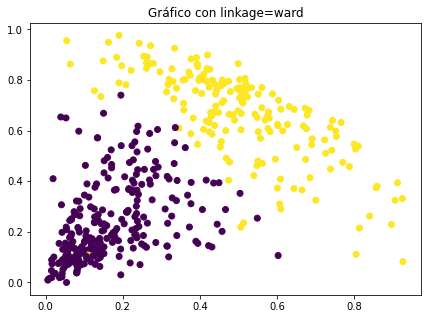

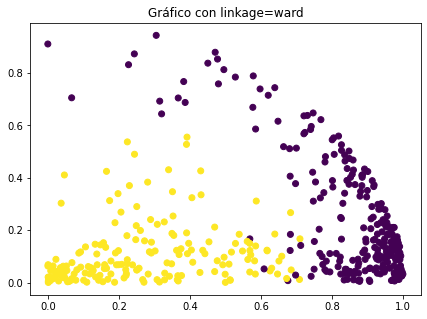

In [17]:
plt.figure(figsize=(7,5))
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'],c=cluster1.labels_)
plt.title('Gráfico con linkage=ward')

plt.figure(figsize=(7,5))
plt.scatter(data_scaled['Fresh'],data_scaled['Frozen'],c=cluster1.labels_)
plt.title('Gráfico con linkage=ward')

plt.show()

Posteriormente graficamos con el **linkage=single**, claramente hay una deficiencia notable en la separación, de hecho está solo tomo dos grupos y uno de ellos solo posee un punto en ambas gráficas apenas notable.

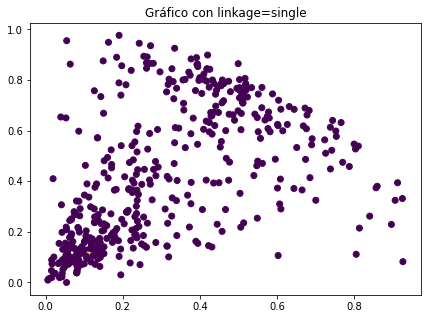

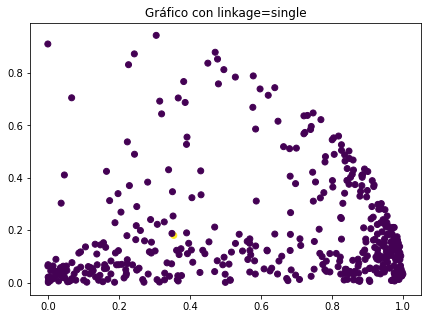

In [18]:
plt.figure(figsize=(7,5))
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'],c=cluster2.labels_)
plt.title('Gráfico con linkage=single')

plt.figure(figsize=(7,5))
plt.scatter(data_scaled['Fresh'],data_scaled['Frozen'],c=cluster2.labels_)
plt.title('Gráfico con linkage=single')

plt.show()

En tercer lugar tenemos las gráficas con **linkage=complete**, se aprecia una mejor separación de los puntos, pero siguen habiendo algunos mezclados que interfieren entre ellos.

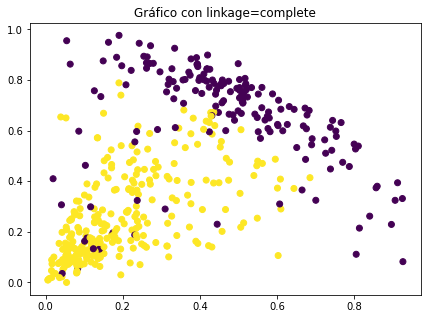

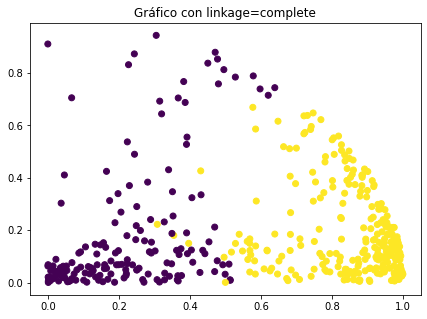

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'],c=cluster3.labels_)
plt.title('Gráfico con linkage=complete')

plt.figure(figsize=(7,5))
plt.scatter(data_scaled['Fresh'],data_scaled['Frozen'],c=cluster3.labels_)
plt.title('Gráfico con linkage=complete')

plt.show()

Finalmente tenemos para el **linkage=average** que curiosamente adopta la misma forma que con **single** pues solo hay un punto en uno de los grupos.

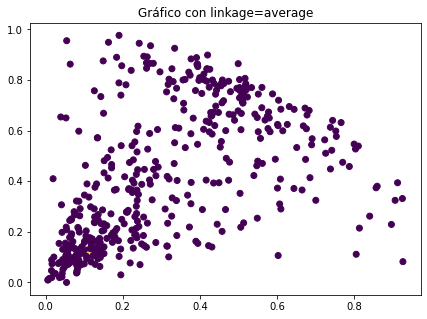

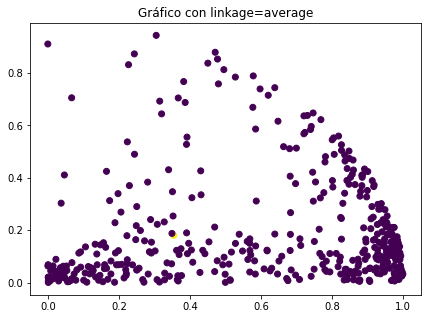

In [20]:
plt.figure(figsize=(7,5))
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'],c=cluster4.labels_)
plt.title('Gráfico con linkage=average')

plt.figure(figsize=(7,5))
plt.scatter(data_scaled['Fresh'],data_scaled['Frozen'],c=cluster4.labels_)
plt.title('Gráfico con linkage=average')

plt.show()

###Conclusión

En este primer ejemplo el mejor **linkage** fue **ward** seguido de **complete**, pues en ambos se logra apreciar una separación clara de los dos grupos, un poco sucia en el segundo, pero en definitiva mejo que cualquiera de los dos restantes donde solo hubo un punto en uno de los grupos pues claramente no pudo absorber o tomar más puntos en cuenta dentro de ese grupo.

## Medida Manhattan

Para la medida Manhattan sólo se probarán para los casos: single, complete y average, ya que el método ward fue creado específicamente para la medida euclidea y pordría causar errores de interpretación.

In [21]:
# Carga y Normalización de los datos 
url='https://bit.ly/2COHM14' 
data=pd.read_csv(url)

data_scaled=normalize(data)
data_scaled=pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Ahora volvemos a utilizar el método *AgglomerativeClustering* para el linkage *single* y la medida Manhattan, graficamos la clasificación de los datos y observamos que se tiene un resultado idéntico al de el mismo linkage con la medida Euclidea.

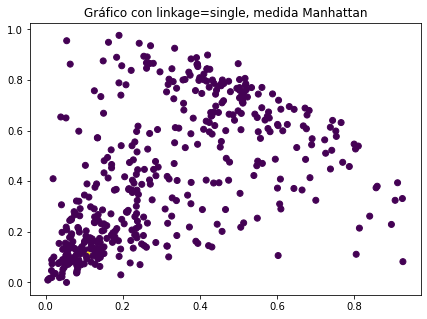

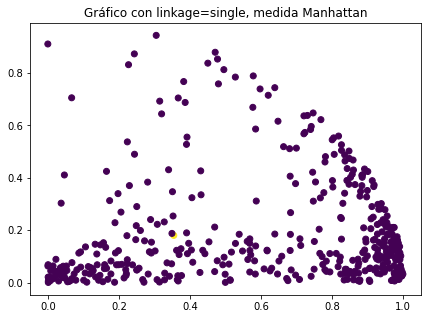

In [22]:
cluster5=AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='single') 
cluster5.fit_predict(data_scaled)

plt.figure(figsize=(7,5))
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'],c=cluster5.labels_)
plt.title('Gráfico con linkage=single, medida Manhattan')

plt.figure(figsize=(7,5))
plt.scatter(data_scaled['Fresh'],data_scaled['Frozen'],c=cluster5.labels_)
plt.title('Gráfico con linkage=single, medida Manhattan')

plt.show()

Para el linkage *complete* y medida Manhattan se obtiene un mejor resultado, incluso que con la medida Euclidea con el mismo linkage, ya que en la primera gráfica ya no hay puntos mezclados en la parte "central" del conjunto,ahora únicamente se mezclan en la frontera, en cuanto a la segunda gráfica la clasificación la hace acertadamente ya que hay una clara distinción entre los conjuntos generados.

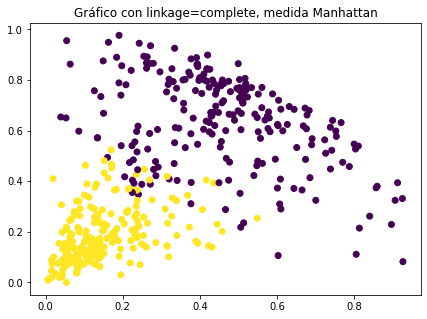

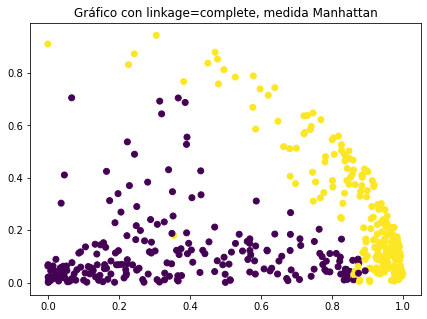

In [23]:
cluster6=AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete') 
cluster6.fit_predict(data_scaled)

plt.figure(figsize=(7,5))
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'],c=cluster6.labels_)
plt.title('Gráfico con linkage=complete, medida Manhattan')

plt.figure(figsize=(7,5))
plt.scatter(data_scaled['Fresh'],data_scaled['Frozen'],c=cluster6.labels_)
plt.title('Gráfico con linkage=complete, medida Manhattan')

plt.show()

Por último se graficó para el linkage *average* y medida Manhattan y hay una gran parecido entre el resultado obtenido con el linkage *ward* y la medida Euclidea. Claramente este resultado es mejor que el obtenido con el mismo linkage para la otra medida, ya que, el otro sólo identifica un punto en un conjunto.

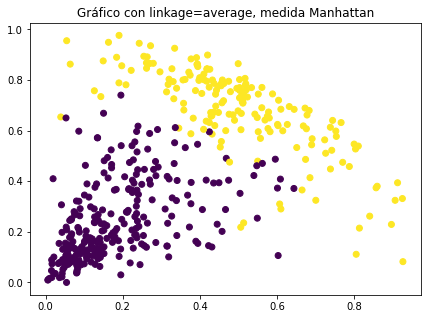

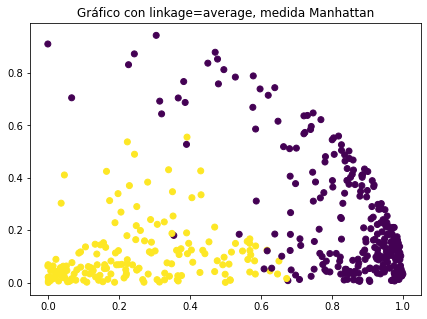

In [24]:
cluster7=AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average') 
cluster7.fit_predict(data_scaled)

plt.figure(figsize=(7,5))
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'],c=cluster7.labels_)
plt.title('Gráfico con linkage=average, medida Manhattan')

plt.figure(figsize=(7,5))
plt.scatter(data_scaled['Fresh'],data_scaled['Frozen'],c=cluster7.labels_)
plt.title('Gráfico con linkage=average, medida Manhattan')

plt.show()

### Conclusión

En general para este conjunto de datos se obtuvieron mejores o iguales resultados usando la medida Manhattan que la Euclidea, demostrando que no siempre la medida Euclidea es la óptima para este algoritmo.

#Tercer ejercicio

## Media Euclidea

El segundo ejemplo toma los datos de los clientes del supermercado.

In [25]:
dataset=pd.read_csv('http://dicyg.fi-c.unam.mx:8080/lalo/pypcd/presentaciones/Mall_Customers.csv')
X=dataset.iloc[:,[3,4]].values
y=dataset.iloc[:,3].values

hc1=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc1=hc1.fit_predict(X)

hc2=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')
y_hc2=hc2.fit_predict(X)

hc3=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
y_hc3=hc3.fit_predict(X)

hc4=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')
y_hc4=hc4.fit_predict(X)


Para el primer gráfico se toma el **linkage=ward**, hay una clara separación de los 5 grupos y es fácil identificar a cada uno

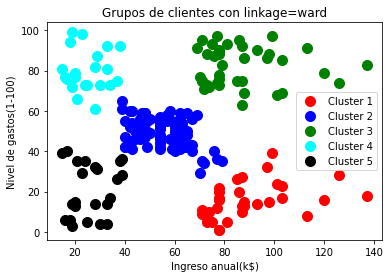

In [26]:
plt.scatter(X[y_hc1==0,0],X[y_hc1==0,1],c='red',s=100, label='Cluster 1')
plt.scatter(X[y_hc1==1,0],X[y_hc1==1,1],c='b',s=100, label='Cluster 2')
plt.scatter(X[y_hc1==2,0],X[y_hc1==2,1],c='green',s=100, label='Cluster 3')
plt.scatter(X[y_hc1==3,0],X[y_hc1==3,1],c='cyan',s=100, label='Cluster 4')
plt.scatter(X[y_hc1==4,0],X[y_hc1==4,1],c='k',s=100, label='Cluster 5')
plt.title('Grupos de clientes con linkage=ward')
plt.xlabel('Ingreso anual(k$)')
plt.ylabel('Nivel de gastos(1-100)')
plt.legend()
plt.show()

El segundo gráfico es respecto a **linkage=single**,  nuevamente no se logra una buena separación, hay pocos puntos en el grupo 1, la mayoría van hacia el grupo 2 y solamente hay un punto para cada uno de los demás grupos.

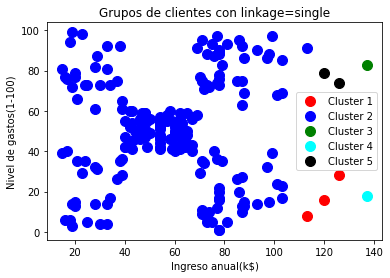

In [27]:
plt.scatter(X[y_hc2==0,0],X[y_hc2==0,1],c='red',s=100, label='Cluster 1')
plt.scatter(X[y_hc2==1,0],X[y_hc2==1,1],c='b',s=100, label='Cluster 2')
plt.scatter(X[y_hc2==2,0],X[y_hc2==2,1],c='green',s=100, label='Cluster 3')
plt.scatter(X[y_hc2==3,0],X[y_hc2==3,1],c='cyan',s=100, label='Cluster 4')
plt.scatter(X[y_hc2==4,0],X[y_hc2==4,1],c='k',s=100, label='Cluster 5')
plt.title('Grupos de clientes con linkage=single')
plt.xlabel('Ingreso anual(k$)')
plt.ylabel('Nivel de gastos(1-100)')
plt.legend()
plt.show()

El tercer gráfico **linkage=complete** igual que el primero logra una separación clara y limpia entre los datos.

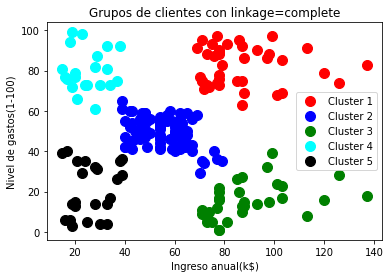

In [28]:
plt.scatter(X[y_hc3==0,0],X[y_hc3==0,1],c='red',s=100, label='Cluster 1')
plt.scatter(X[y_hc3==1,0],X[y_hc3==1,1],c='b',s=100, label='Cluster 2')
plt.scatter(X[y_hc3==2,0],X[y_hc3==2,1],c='green',s=100, label='Cluster 3')
plt.scatter(X[y_hc3==3,0],X[y_hc3==3,1],c='cyan',s=100, label='Cluster 4')
plt.scatter(X[y_hc3==4,0],X[y_hc3==4,1],c='k',s=100, label='Cluster 5')
plt.title('Grupos de clientes con linkage=complete')
plt.xlabel('Ingreso anual(k$)')
plt.ylabel('Nivel de gastos(1-100)')
plt.legend()
plt.show()

Por último con **linkage=average**, se logran notar cuatro grupos bien separados, pero el último parece casi nulo, como si el segundo grupo hubiese absorbido para de sus puntos.

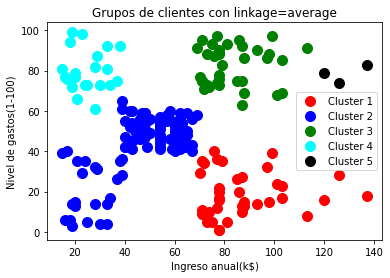

In [29]:
plt.scatter(X[y_hc4==0,0],X[y_hc4==0,1],c='red',s=100, label='Cluster 1')
plt.scatter(X[y_hc4==1,0],X[y_hc4==1,1],c='b',s=100, label='Cluster 2')
plt.scatter(X[y_hc4==2,0],X[y_hc4==2,1],c='green',s=100, label='Cluster 3')
plt.scatter(X[y_hc4==3,0],X[y_hc4==3,1],c='cyan',s=100, label='Cluster 4')
plt.scatter(X[y_hc4==4,0],X[y_hc4==4,1],c='k',s=100, label='Cluster 5')
plt.title('Grupos de clientes con linkage=average')
plt.xlabel('Ingreso anual(k$)')
plt.ylabel('Nivel de gastos(1-100)')
plt.legend()
plt.show()

###Conclusión##

En este caso, aunque nuevamente el **complete** y **ward** son los mejores y más claros, el **average** parece ser también una buena opción pues logra separar bien al menos 4 grupos, y como antes **single** no da la talla para una óptima separación.

## Medida Manhattan

In [30]:
# Carga de los datos
dataset=pd.read_csv('http://dicyg.fi-c.unam.mx:8080/lalo/pypcd/presentaciones/Mall_Customers.csv')
X=dataset.iloc[:,[3,4]].values
y=dataset.iloc[:,3].values

Para el linkage *single* y medida Manhattan en este conjunto se obtiene un resultado esencialmente igual que para la media Euclidea y mismo linkage, la mayoría de los puntos se clasificaron en un sólo grupo y algunos puntos dispersos a la derecha se clasificaron en los grupos restantes.

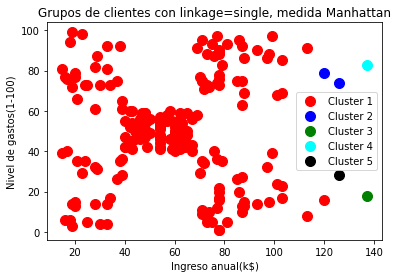

In [31]:
hc5=AgglomerativeClustering(n_clusters=5,affinity='manhattan',linkage='single')
y_hc5=hc5.fit_predict(X)

plt.scatter(X[y_hc5==0,0],X[y_hc5==0,1],c='red',s=100, label='Cluster 1')
plt.scatter(X[y_hc5==1,0],X[y_hc5==1,1],c='b',s=100, label='Cluster 2')
plt.scatter(X[y_hc5==2,0],X[y_hc5==2,1],c='green',s=100, label='Cluster 3')
plt.scatter(X[y_hc5==3,0],X[y_hc5==3,1],c='cyan',s=100, label='Cluster 4')
plt.scatter(X[y_hc5==4,0],X[y_hc5==4,1],c='k',s=100, label='Cluster 5')
plt.title('Grupos de clientes con linkage=single, medida Manhattan')
plt.xlabel('Ingreso anual(k$)')
plt.ylabel('Nivel de gastos(1-100)')
plt.legend()
plt.show()

Para la medida Manhattan y el linkage *complete* no se obtiene el resultado esperado, la mitad derecha del conjunto "central" se clasifica dentro del conjunto "superior izwquierdo", en este caso se obtiene un peor resultado que en su versión Euclidea que produce un resultado óptimo.

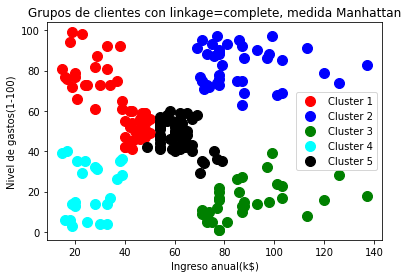

In [32]:
hc6=AgglomerativeClustering(n_clusters=5,affinity='manhattan',linkage='complete')
y_hc6=hc6.fit_predict(X)

plt.scatter(X[y_hc6==0,0],X[y_hc6==0,1],c='red',s=100, label='Cluster 1')
plt.scatter(X[y_hc6==1,0],X[y_hc6==1,1],c='b',s=100, label='Cluster 2')
plt.scatter(X[y_hc6==2,0],X[y_hc6==2,1],c='green',s=100, label='Cluster 3')
plt.scatter(X[y_hc6==3,0],X[y_hc6==3,1],c='cyan',s=100, label='Cluster 4')
plt.scatter(X[y_hc6==4,0],X[y_hc6==4,1],c='k',s=100, label='Cluster 5')
plt.title('Grupos de clientes con linkage=complete, medida Manhattan')
plt.xlabel('Ingreso anual(k$)')
plt.ylabel('Nivel de gastos(1-100)')
plt.legend()
plt.show()

Por último el linkage *average* y la medida Manhattan se obtiene un buen resultado, el mejor para dicha medida y también es mejor que el del mismo linkage pero distinta medida.

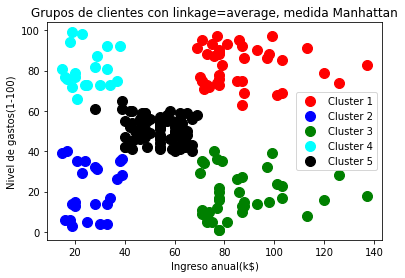

In [33]:
hc7=AgglomerativeClustering(n_clusters=5,affinity='manhattan',linkage='average')
y_hc7=hc7.fit_predict(X)

plt.scatter(X[y_hc7==0,0],X[y_hc7==0,1],c='red',s=100, label='Cluster 1')
plt.scatter(X[y_hc7==1,0],X[y_hc7==1,1],c='b',s=100, label='Cluster 2')
plt.scatter(X[y_hc7==2,0],X[y_hc7==2,1],c='green',s=100, label='Cluster 3')
plt.scatter(X[y_hc7==3,0],X[y_hc7==3,1],c='cyan',s=100, label='Cluster 4')
plt.scatter(X[y_hc7==4,0],X[y_hc7==4,1],c='k',s=100, label='Cluster 5')
plt.title('Grupos de clientes con linkage=average, medida Manhattan')
plt.xlabel('Ingreso anual(k$)')
plt.ylabel('Nivel de gastos(1-100)')
plt.legend()
plt.show()

### Conclusión

Para este conjunto de datos con el linkage *single* se obtuvo un resultado similar a la medida Euclidea, para *complete* un resultado peor y para *average* uno mejor, lo cual nos indica que dependiendo del conjunto y linkage una medida va a ofrecer mejores o peores resultados, no hay una que sea mejor que la otra, depende del contexto.